In [46]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
X_train = pd.read_csv('X_train.csv').set_index('Doctor Identifier')
provider2num = {}
ctr = 0
for provider in list(set(X_train['Provider Type'])):
    provider2num[provider] = ctr
    ctr += 1
X_train['Provider Type'] = [provider2num[d] for d in X_train['Provider Type']]

In [32]:
print X_train.shape
X_train.head()

(18000, 30)


,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
Doctor Identifier,,,,,,,,,,,,,,,,,,,,,
450181093,22,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
375128823,67,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
429379427,12,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
993555030,63,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
786413532,23,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [21]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.explained_variance_ratio_

array([  9.70140442e-01,   2.30655427e-02,   6.12754219e-03,
         3.72254359e-04,   2.33062320e-04,   4.72001058e-05,
         1.05876913e-05,   2.96855982e-06,   2.41048760e-07,
         1.54377373e-07,   3.24251809e-09,   6.15431771e-10,
         4.04662041e-10,   1.12436717e-10,   1.03038901e-10,
         6.30414216e-11,   3.45897633e-11,   2.67411323e-11,
         2.27165861e-11,   2.04046800e-11,   1.75305094e-11,
         1.35892651e-11,   1.23447810e-11,   1.01322706e-11,
         7.15715789e-12,   6.32005363e-12,   5.05234947e-12,
         3.84448776e-12,   3.74724190e-12,   2.82248469e-14])

In [23]:
pca.components_[0]

array([  2.20246292e-08,   8.78564400e-03,   6.32417820e-04,
         9.52081178e-01,   1.90653059e-01,   1.68080683e-01,
         1.67867208e-01,   1.07773605e-04,   2.05326843e-02,
         9.19030313e-03,   7.18996607e-03,   7.19088597e-03,
         8.67582148e-03,   3.82871039e-07,   3.11786902e-07,
         2.53068064e-07,   2.92069276e-07,   4.39249754e-07,
         5.15345420e-07,   3.46518105e-07,   1.02466198e-08,
         4.56424478e-07,   7.38632741e-07,   7.57704169e-07,
         5.87630315e-07,   2.57142992e-07,   5.20173822e-07,
         8.68310011e-08,   1.87252188e-07,   8.84243592e-09])

In [34]:
cols_sorted = X_train.columns[np.argsort(pca.components_[0])[::-1]].values
print cols_sorted

['Total Submitted Charge Amount' 'Total Allowed Amount'
 'Total Payment Amount' 'Total Standardized Payment Amount'
 'Total Drug Submitted Charge Amount' 'Total Drug Allowed Amount '
 'Number of Services' 'Number of Medical Services'
 'Total Drug Standardized Payment Amount' 'Total Drug Payment Amount '
 'Number of Beneficiaries' 'Number of Drug Services'
 'Percent Hypertension ' 'Percent Hyperlipidemia '
 'Percent Ischemic Heart Disease '
 'Percent Rheumatoid Arthritis or Osteoarthritis '
 'Percent Chronic Kidney Disease' 'Percent Diabetes '
 'Percent Heart Failure ' 'Percent Atrial Fibrillation'
 'Percent Chronic Obstructive Pulmonary Disease'
 'Percent Alzheimer\xe2\x80\x99s Disease or Dementia ' 'Percent Cancer '
 'Percent Osteoporosis ' 'Percent Asthma ' 'Percent Stroke '
 'Percent Schizophrenia or Other Psychotic Disorders ' 'Provider Type'
 'Percent Depression ' 'Average HCC Risk Score of Beneficiaries ']


*** The explained variance of the first PCA component is 97%. This components appears to mostly describe charge amounts and payment amounts. ***

In [47]:
X_adj = pd.DataFrame()
X_adj['ChargePerPatient'] = X_train['Total Submitted Charge Amount']/X_train['Number of Beneficiaries']
X_adj['DrugChargePerPatient'] = X_train['Total Drug Submitted Charge Amount']/X_train['Number of Beneficiaries']
X_adj['PercentChargePaid'] = X_train['Total Payment Amount']/X_train['Total Submitted Charge Amount']
X_adj['PercentDrugChargePaid'] = X_train['Total Drug Payment Amount ']/X_train['Total Submitted Charge Amount']
X_adj['PercentAllowedPaid'] = X_train['Total Payment Amount']/X_train['Total Allowed Amount']
X_adj['AveragePatientRisk'] = X_train['Average HCC Risk Score of Beneficiaries ']
print X_adj.shape
X_adj.head()

(18000, 6)


,ChargePerPatient,DrugChargePerPatient,PercentChargePaid,PercentDrugChargePaid,PercentAllowedPaid,AveragePatientRisk
Doctor Identifier,,,,,,
450181093,796.212121,0.000000,0.651032,0.000000,0.746529,1.28
375128823,783.924171,137.052133,0.376390,0.089333,0.739264,1.52
429379427,841.114320,50.702927,0.327816,0.032097,0.756085,1.11
993555030,69.880952,0.000000,0.562968,0.000000,0.563382,1.00
786413532,385.823529,0.000000,0.298186,0.000000,0.979997,1.57


In [59]:
print "Average Charge Per Patient:", np.mean(X_adj.ChargePerPatient)
print "Standard Dev Charge Per Patient:", np.std(X_adj.ChargePerPatient)
X_adj.sort_values(by=['ChargePerPatient'], ascending=False).head(10)

Average Charge Per Patient: 1125.30825161
Standard Dev Charge Per Patient: 10549.8475495


,ChargePerPatient,DrugChargePerPatient,PercentChargePaid,PercentDrugChargePaid,PercentAllowedPaid,AveragePatientRisk
Doctor Identifier,,,,,,
384220740,1.314173e+06,1314172.89,0.335775,0.335775,0.783954,3.15
715390327,3.676962e+05,0.00,0.115020,0.000000,0.761992,2.84
970788777,1.428823e+05,0.00,0.312982,0.000000,0.695516,3.46
621690803,1.356667e+05,0.00,0.147503,0.000000,0.736119,1.74
996108193,1.183366e+05,0.00,0.159847,0.000000,0.979695,2.48
886011918,1.125924e+05,0.00,0.224126,0.000000,0.797859,0.60
259764167,9.296184e+04,0.00,0.557658,0.000000,0.772319,3.83
932051490,8.669140e+04,0.00,0.483661,0.000000,0.728297,0.94
750384742,7.945644e+04,0.00,0.317072,0.000000,0.732451,1.24


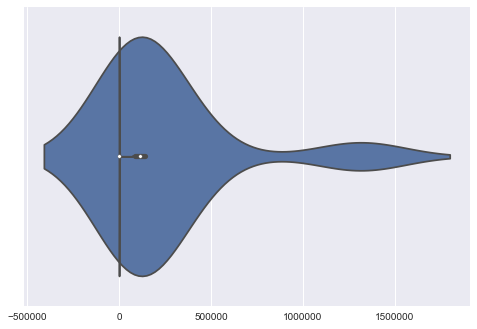

In [57]:
sns.violinplot(sorted(X_adj.ChargePerPatient)[:-10])
plt.show()

*** Charge per patient distribution appears to be bimodal. ***

In [60]:
pca = PCA()
pca.fit(X_adj)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca.explained_variance_ratio_

array([  9.64292111e-01,   3.57078869e-02,   2.23334716e-09,
         1.80810558e-10,   3.66204604e-11,   9.31637095e-12])

In [62]:
pca.components_[0]

array([  7.34629586e-01,   6.78468402e-01,  -2.03064352e-07,
         1.02447787e-07,   1.86825742e-08,   1.37520711e-06])

*** Charge per patient and drug charge per patient appear to ***